<a href="https://colab.research.google.com/github/ashishrai96/SMAI-assignments/blob/master/Assignment3/rollnumber_Assignment3_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Packages Used
- Keras [link](https://keras.io/guides/)

## Submission
- Rename the notebook to `<roll_number>_Assignment3_Q1.ipynb`.

## Question 1

This question is based on seminal work by Zhang et al. The paper is titled 'Understanding deep learning requires rethinking generalization'. The paper talks about how the traditional methods fail to explain generalization of neural network. They show that a sufficiently parameterized network can easily fit a random labeling of the training data. This fitting cannot be curbed by explicit regularization.


## Q) 1.1 
Lets take a hello world dataset for ML algorithm the MNIST!
This question requires you to train a convolutional neural network.
Architecture: 4 layers of convolution with 64 filters in each layer. Keep activation map size same using padding.

In [42]:
from tensorflow import keras   # feel free to use MNIST data from other sources 
import numpy as np

In [43]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [44]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train data shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

Train data shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### One-hot-encode your labels here

In [45]:
print ('label shape: ',np.shape(y_train),np.shape(y_test))
def encode(y):
    return keras.utils.to_categorical(y)

y_train = encode(y_train)
y_test = encode(y_test)
print ('label shape: ',np.shape(y_train),np.shape(y_test))
y_train[0]

label shape:  (60000,) (10000,)
label shape:  (60000, 10) (10000, 10)


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#### Define the model mentioned above
    1) Print the number of trainable parameters
     Use sgd optimizer with softmax at last layer 
     Train the model until convergence (use test data only for model selection and early stopping!)
    2) Report the train and test accuracy
    3) Plot the train and test accuracy and loss throughout the training

In [46]:
#code here
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.losses import categorical_crossentropy
from keras.callbacks import EarlyStopping

def create_model():
  # model = Sequential()
  # model.add(Conv2D(64, (3,3), padding="same", activation='relu', input_shape=(28, 28, 1)))
  # # model.add(MaxPool2D(padding='same'))
  # model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
  # # model.add(MaxPool2D(padding='same'))
  # model.add(Dropout(0.4))
  # model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
  # # model.add(MaxPool2D(padding='same'))
  # model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
  # # model.add(MaxPool2D(padding='same'))

  # model.add(Flatten())
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(activation='softmax', units=10))
  # model.compile(loss=categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])
  # model.summary()
  model = Sequential()
  model.add(Conv2D(64, kernel_size=4, activation='relu', padding='same', input_shape=x_train[0].shape))
  model.add(Conv2D(64, kernel_size=4, activation='relu', padding='same'))
  model.add(Dropout(0.4))
  model.add(Conv2D(64, kernel_size=4, activation='relu', padding='same'))
  model.add(Conv2D(64, kernel_size=4, activation='relu', padding='same'))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))

  sgd_fn = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=sgd_fn, loss='categorical_crossentropy', metrics=['accuracy'])
  return model
 

In [47]:

def get_trained_model(model, x_train, y_train, x_test, y_test):
  earlyStopping = EarlyStopping(monitor = "val_loss", patience = 2)
  trained_model = model.fit(x_train, y_train, batch_size=60, epochs=20, validation_data=(x_test, y_test))
  return trained_model

In [48]:
model = create_model()
trained_model = get_trained_model(model, x_train, y_train, x_test, y_test)

test_eval = model.evaluate(x_test, y_test)

print("-----------------------------------")
print("Test Loss: ", test_eval[0])
print("Test Accuracy: ", test_eval[1])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 dropout_3 (Dropout)         (None, 28, 28, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 flatten_3 (Flatten)         (None, 50176)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

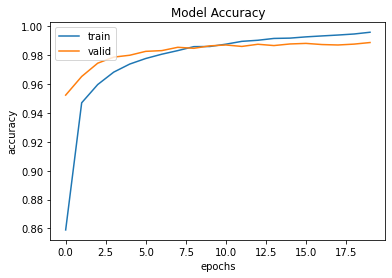

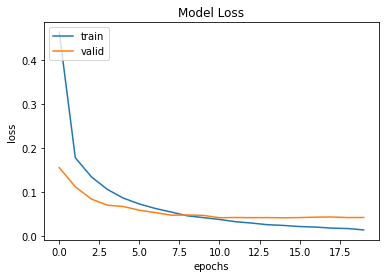

In [49]:
from matplotlib import pyplot as plt

def plot_graph(trained_model):
  accuracy = trained_model.history['accuracy']
  val_accuracy = trained_model.history['val_accuracy']
  loss = trained_model.history['loss']
  val_loss = trained_model.history['val_loss']

  plt.plot(accuracy)
  plt.plot(val_accuracy)
  plt.title('Model Accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(['train','valid'], loc='upper left')
  plt.show()
  
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model Loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend(['train','valid'], loc='upper left')
  plt.show()


plot_graph(trained_model)



## Q) 1.2
Now lets start adding label noise to the dataset


1) Randomize 20% of train labels and repeat Q1 (1,2 & 3)

2) Randomize 40% of train labels and repeat Q1 (3)

3) Randomize 60% of train labels and repeat Q1 (3)

4) Randomize 80% of train labels and repeat Q1 (3)

5) Randomize 100% of train labels and repeat Q1 (3)


In [50]:
import random

def randomize_train_labels(y_train, percentage):
  data_len = len(y_train)
  size = int(percentage * float(data_len))
  lst = random.sample(range(0,data_len), size)
  
  for idx in lst:
    tmp = [0] * 10
    tmp_idx = random.sample(range(0,10), 1)[0]
    tmp[tmp_idx] = 1

    y_train[idx] = tmp

  return y_train


Epoch 1/20
1000/1000 [==============================] - 29s 29ms/step - loss: 2.3317 - accuracy: 0.1013 - val_loss: 2.2949 - val_accuracy: 0.1013
Epoch 2/20
1000/1000 [==============================] - 29s 29ms/step - loss: 2.3021 - accuracy: 0.1014 - val_loss: 2.2888 - val_accuracy: 0.1619
Epoch 3/20
1000/1000 [==============================] - 29s 29ms/step - loss: 2.3012 - accuracy: 0.1041 - val_loss: 2.2849 - val_accuracy: 0.1624
Epoch 4/20
1000/1000 [==============================] - 30s 30ms/step - loss: 2.2999 - accuracy: 0.1073 - val_loss: 2.2744 - val_accuracy: 0.1936
Epoch 5/20
1000/1000 [==============================] - 30s 30ms/step - loss: 2.2982 - accuracy: 0.1102 - val_loss: 2.2692 - val_accuracy: 0.1533
Epoch 6/20
1000/1000 [==============================] - 29s 29ms/step - loss: 2.2961 - accuracy: 0.1089 - val_loss: 2.2632 - val_accuracy: 0.1728
Epoch 7/20
1000/1000 [==============================] - 29s 29ms/step - loss: 2.2941 - accuracy: 0.1095 - val_loss: 2.2467 -

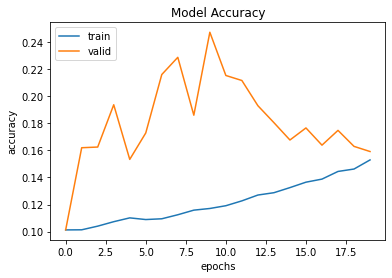

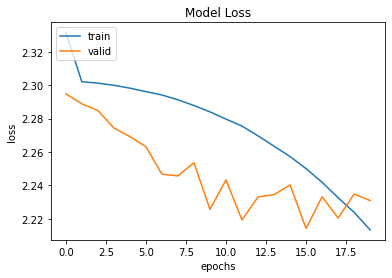

Epoch 1/20
1000/1000 [==============================] - 29s 29ms/step - loss: 2.2037 - accuracy: 0.1552 - val_loss: 2.2411 - val_accuracy: 0.1624
Epoch 2/20
1000/1000 [==============================] - 29s 29ms/step - loss: 2.1908 - accuracy: 0.1614 - val_loss: 2.2447 - val_accuracy: 0.1516
Epoch 3/20
1000/1000 [==============================] - 29s 29ms/step - loss: 2.1800 - accuracy: 0.1662 - val_loss: 2.2522 - val_accuracy: 0.1530
Epoch 4/20
1000/1000 [==============================] - 30s 30ms/step - loss: 2.1672 - accuracy: 0.1673 - val_loss: 2.2395 - val_accuracy: 0.1550
Epoch 5/20
1000/1000 [==============================] - 30s 30ms/step - loss: 2.1521 - accuracy: 0.1741 - val_loss: 2.2637 - val_accuracy: 0.1313
Epoch 6/20
1000/1000 [==============================] - 31s 31ms/step - loss: 2.1411 - accuracy: 0.1814 - val_loss: 2.2794 - val_accuracy: 0.1301
Epoch 7/20
1000/1000 [==============================] - 30s 30ms/step - loss: 2.1263 - accuracy: 0.1869 - val_loss: 2.2699 -

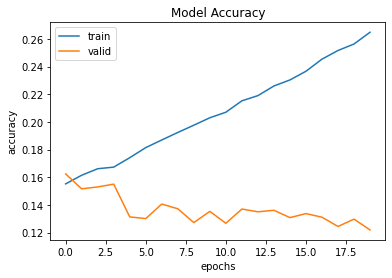

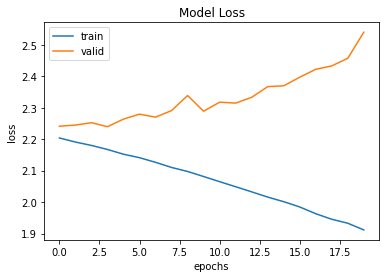

Epoch 1/20
1000/1000 [==============================] - 30s 30ms/step - loss: 1.8942 - accuracy: 0.2694 - val_loss: 2.5518 - val_accuracy: 0.1175
Epoch 2/20
1000/1000 [==============================] - 31s 31ms/step - loss: 1.8795 - accuracy: 0.2744 - val_loss: 2.5352 - val_accuracy: 0.1256
Epoch 3/20
1000/1000 [==============================] - 30s 30ms/step - loss: 1.8599 - accuracy: 0.2807 - val_loss: 2.5675 - val_accuracy: 0.1298
Epoch 4/20
1000/1000 [==============================] - 31s 31ms/step - loss: 1.8463 - accuracy: 0.2845 - val_loss: 2.6382 - val_accuracy: 0.1107
Epoch 5/20
1000/1000 [==============================] - 31s 31ms/step - loss: 1.8280 - accuracy: 0.2924 - val_loss: 2.5978 - val_accuracy: 0.1206
Epoch 6/20
1000/1000 [==============================] - 31s 31ms/step - loss: 1.8130 - accuracy: 0.2966 - val_loss: 2.6665 - val_accuracy: 0.1189
Epoch 7/20
1000/1000 [==============================] - 30s 30ms/step - loss: 1.7912 - accuracy: 0.3040 - val_loss: 2.7122 -

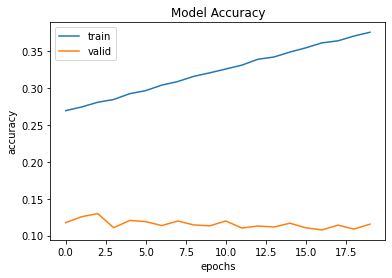

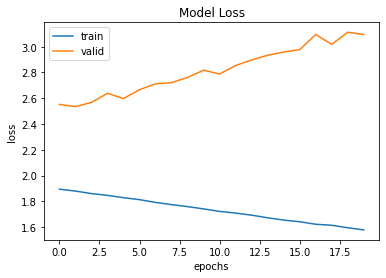

Epoch 1/20
1000/1000 [==============================] - 30s 30ms/step - loss: 1.5607 - accuracy: 0.3808 - val_loss: 3.1451 - val_accuracy: 0.1173
Epoch 2/20
1000/1000 [==============================] - 31s 31ms/step - loss: 1.5470 - accuracy: 0.3870 - val_loss: 3.1306 - val_accuracy: 0.1147
Epoch 3/20
1000/1000 [==============================] - 31s 31ms/step - loss: 1.5338 - accuracy: 0.3899 - val_loss: 3.2018 - val_accuracy: 0.1157
Epoch 4/20
1000/1000 [==============================] - 30s 30ms/step - loss: 1.5131 - accuracy: 0.4006 - val_loss: 3.2078 - val_accuracy: 0.1116
Epoch 5/20
1000/1000 [==============================] - 30s 30ms/step - loss: 1.4964 - accuracy: 0.4054 - val_loss: 3.2729 - val_accuracy: 0.1162
Epoch 6/20
1000/1000 [==============================] - 30s 30ms/step - loss: 1.4830 - accuracy: 0.4108 - val_loss: 3.3200 - val_accuracy: 0.1175
Epoch 7/20
1000/1000 [==============================] - 31s 31ms/step - loss: 1.4671 - accuracy: 0.4132 - val_loss: 3.4389 -

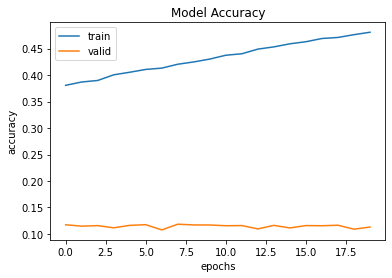

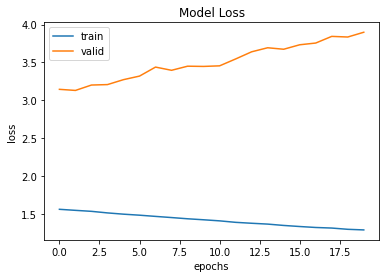

Epoch 1/20
1000/1000 [==============================] - 30s 30ms/step - loss: 1.2720 - accuracy: 0.4872 - val_loss: 3.8736 - val_accuracy: 0.1140
Epoch 2/20
1000/1000 [==============================] - 31s 31ms/step - loss: 1.2587 - accuracy: 0.4891 - val_loss: 3.9930 - val_accuracy: 0.1152
Epoch 3/20
1000/1000 [==============================] - 31s 31ms/step - loss: 1.2412 - accuracy: 0.4999 - val_loss: 4.0293 - val_accuracy: 0.1135
Epoch 4/20
1000/1000 [==============================] - 30s 30ms/step - loss: 1.2323 - accuracy: 0.5015 - val_loss: 4.0292 - val_accuracy: 0.1128
Epoch 5/20
1000/1000 [==============================] - 30s 30ms/step - loss: 1.2218 - accuracy: 0.5042 - val_loss: 4.0092 - val_accuracy: 0.1197
Epoch 6/20
1000/1000 [==============================] - 30s 30ms/step - loss: 1.2060 - accuracy: 0.5128 - val_loss: 4.1278 - val_accuracy: 0.1150
Epoch 7/20
1000/1000 [==============================] - 31s 31ms/step - loss: 1.1995 - accuracy: 0.5135 - val_loss: 4.1736 -

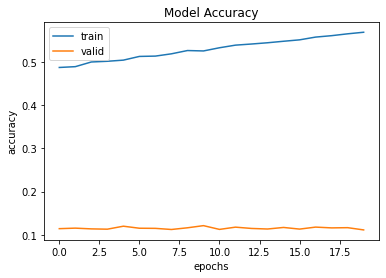

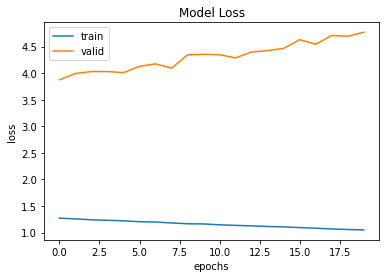

In [51]:
y_train_1 = randomize_train_labels(y_train, 0.2)
y_train_2 = randomize_train_labels(y_train, 0.4)
y_train_3 = randomize_train_labels(y_train, 0.6)
y_train_4 = randomize_train_labels(y_train, 0.8)
y_train_5 = randomize_train_labels(y_train, 1)


trained_model = get_trained_model(model, x_train, y_train_1, x_test, y_test)
plot_graph(trained_model)

trained_model = get_trained_model(model, x_train, y_train_2, x_test, y_test)
plot_graph(trained_model)

trained_model = get_trained_model(model, x_train, y_train_3, x_test, y_test)
plot_graph(trained_model)

trained_model = get_trained_model(model, x_train, y_train_4, x_test, y_test)
plot_graph(trained_model)

trained_model = get_trained_model(model, x_train, y_train_5, x_test, y_test)
plot_graph(trained_model)